<h1 align="center"> Logistic Regression</h1>

## Program so far
***
 - We learnt about different types of Machine Learning Problems

 - We learnt how to fit a linear model to our data to predict House Prices in New York
 
 - We learnt how to use "Advanced Linear Regression" techniques where we prevented overfitting by using
 
      - **Lasso Regression: which performs the L1 Regularization technique**
      
      - **Ridge Regression: which performs the L2 Regularization technique**
      

## Agenda for the Day
***
* Decision Boundary
* Hyperparameter Tuning
* Cost Function
* Gradient Descent
* Evaluating Matrix
* Precision and Recall
* Logarithmic Loss

## John's Dilemma
***
Finally, John had decided on a house to buy. This was the perfect house for him in Brooklyn

But he was running lower than expected on his savings and thus, didn't have enough money to buy a new one

**So, he thought of taking a loan.**



## John's Dilemma 
***
 - But taking a loan in New York City, at high interest rates, would be too expensive for him in the long run! 

- Besides, he wasn't sure whether he would get the required loan.

- So, he started looking for current trends of the loan approval.

 - Luckily he stumbled upon a dataset which had details about the loan approval.
Let's explore it, along with him.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## What type of Problem is this? 
***
 - Let's try and gain some intuition
 - The graph on the next slide depicts if a patient's Tumor is Malignant (Cancerous) or not **{1: Yes; 0: No}** 
 based on the Tumor Size present in his/her body
 
 - Tumor Size is taken on the *x-axis* whereas the outcome, i.e., whether the patient's Tumor is Malginant or not is taken on the *Y-axis*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

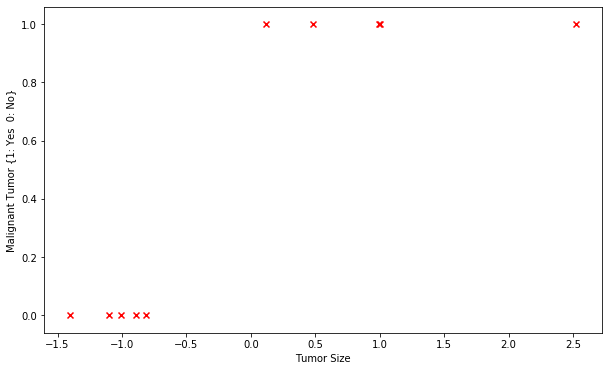

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.ylabel("Malignant Tumor {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## What type of Problem is this? 
***
 - The output, "y" has two **categories** i.e. 1 (Yes) or 0 (No) 
 
 - Thus, as we have learnt before, this is a **Classification Problem** where we are using our dependent variables, in this case Tumor Size, and are getting a **binary** output, 1 (Yes) or 0 (No)! 
 
 - Let's approach this problem with what we've learnt so far

## John's Problem Explained
***
 - Through the data set John collected, he basically wanted to find out that using different characteristics, do loans get approved {1: Yes} or not {0: No}
 
 - This is, in essence, nothing but a classification problem. John collected a data set that described what type of loan requests got approved and rejected
 
 - He wanted to check, before applying, whether his request would be approved after he fit the **right model** on the data! 
 
 - Let's build our intution on the '*model building*' part using the Tumor data! You will see how comprehensive this approach is

## Using Linear Regression to solve a classification problem
***

* Lets try and apply the same Linear Regression model we learned to solve the problem of classification on a dataset.

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
z = np.linspace(-2, 2, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

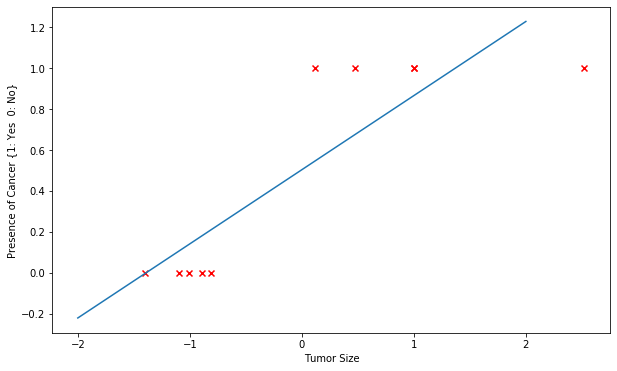

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")

plt.show()


## So what now? Intuition behind the Decision Boundary
***
* We have fitted a linear regression model which is represented by the blue line
* How do we convert a continuous output into a discrete one?
* One way we can do is using a threshold value for the linear regression output


* Our output is either 1 or 0, and since we can even get predicted values between 0 and 1 like 0.2, 0.6, etc. (The regression line), we need to come up with a method where our output (0.2, 0.6, etc) is **transformed** to either **0** or **1**


* A reasonable threshold to keep for a 0-1 problem is 0.5. So, if our predicted value (y) is **greater than 0.5** then we assign a **"1"** to it 
* If y is **less than 0.5** then we assign a **"0"** to it


## Decision Boundary
***

* Tracing the line of y = 0.5 all the way to it's corresponding x - value (See graph below) we can get to know this "Threshold" value

* This "Threshold Value" is x = __

* This means that if x > _ then y > 0.5 (i.e. y = 1) 

* If x < _ then y < 0.5 (i.e. y = 0)

* Therefore, this vertical line (x = _ ) which separates the 2 classes (y = 1 & 0) ---> **Decision Boundary**

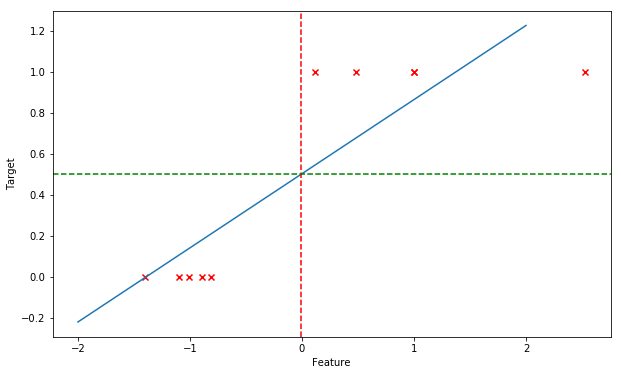

In [6]:
x_critical = (0.5 - lm.intercept_)/ lm.coef_

plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')

## Linear Regression - Not a Good Idea
***
* It turns out, that Sean Ben is right! 


* The problem with this approach is that Linear Regression isn't robust to outliers and it changes the fit drastically in the presence of an outlier


* We'll add an outlier and keep the same threshold as before to see the difference.

In [7]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
lm = LinearRegression()
lm.fit(X, y)
z = np.linspace(-2, new_obs, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)
x_critical2 = (0.5 - lm.intercept_)/ lm.coef_

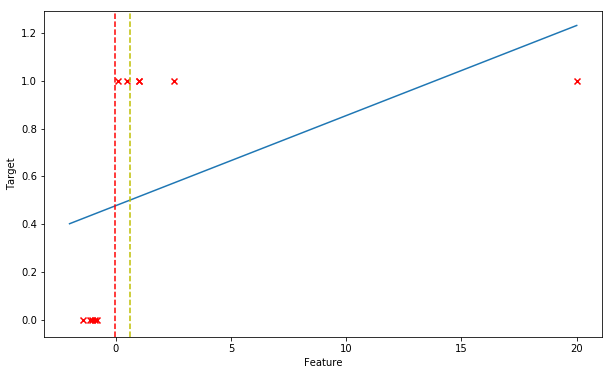

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Linear Regression - Not a Good Idea 
***
* We see that our Decision Boundary has shifted to the right. As a result we get some incorrect predicted "y-values" (the one's left of the boundary) 

* Since the data is labeled we know that they're originally = "1". But being on the left of the decision boundary indicates that they should be assigned a "0"

* Thus Linear Regression is not suitable for classification tasks as it is highly sensitive to outliers

* We clearly need a better model to solve the problem of classification

## Enter Logistic Regression
***
* To overcome the limitations of Linear Regression we'll use another model suitable for classification i.e., Logistic Regression.


* What do we need? 
  - We need 0 <= y <= 1
  
* For this purpose we need to use a different function (and not the Linear Regression "y = mx + b")

* This function is the **Sigmoid Function**


## What is the Sigmoid function?
***
* We need to get the values in the range of (0,1) 

* Let's have a look at the graph of the Sigmoid Function and then get into building the intuition
***
<center><img src='../images/sigmoid.png' alt="Oh Chris" style="width: 275px;"/></center>

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Intuition
***
 - The function above is $g(z) = \frac {1} {(1 + e^(-z))}$   for values of t ranging from - infinity , + infinity
 
 - $g(z)$ is also called as "Sigmoid of 'z' or just sig(z)"
 
 - Again, let's start by plugging in the extremes of it's range
 
 $g(-infinity) = \frac {1} {(1 + infinity)} = ~0$
 
 
   $g( infinity) = \frac {1} {(1 + ~0)} = ~1$
 
 - No matter what value "z" takes, we will always get an answer in the range of **[0,1]**

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Simple Modifications
***

 - Now, instead of sig(z) let's consider sig(y) **where y ---> our response**
 
 - But as discussed before; $y = \theta_0 + \theta_1(x1) + \theta_2(x_2) + .. + \theta_n(x_n)$
 
 - Thus, $g(y) = g(h_{\theta}(x)) = 1/(1 + e^{-(\theta* X)})$

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Interpretation - Let's put it simply
***
In essence: 

 - $h_θ(x)$ is the ** Estimated Probability that y = 1 on input "X"** 
 
 - Example: $h_θ(x)$ = 0.7 in our Tumor problem **MEANS** there is a 70% chance of Tumor being **Malignant**
 
 - Thus, mathematically, $h_θ(x)$ = P(y=1 | x; θ) means that **Probability that that y = 1 given X is parameterized by θ**
 
 - Thus **P(y=1 | x;θ) + P(y=0 | x;θ) = 1**



<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Decision Boundary Intuition with Examples
***

We can see that g(z) >= 0.5 when z >= 0

Thus $h_θ(x)$ = g(θ*X)) >= 0.5 whenever θ x $X$ >= 0

<center><img src='../images/sigmoid.png' alt="Oh Chris" style="width: 275px;"/></center>

 - Consider: hθ(x) = g(θ0 + θ1x1 + θ2x2)

 - The graph below shows y - values (0 when "O" & 1 when "X") given values of x1 & x2
***
<center><img src='../images/Image[4].png' alt="Math" style="width: 275px;"/></center>

So, for example  $θ_0 = -3, θ_1 = 1, θ_2 = 1$
     
So our parameter vector is a column vector with the above values
   - So, θT  = [-3,1,1]
   
Thus the z here becomes θ x $X$


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Diving Deeper
***
We predict "y = 1" if
  - -3x0 + 1x1 + 1x2 >= 0
  - -3 + x1 + x2 >= 0
  
We can also re-write this as
 - If (x1 + x2 >= 3) then we predict y = 1
 - If we plot x1 + x2 = 3 we graphically plot our decision boundary (See next slide)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Diving Deeper
***
<center><img src='../images/Image[5].png' alt="Math" style="width: 275px;"/></center>

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Diving Deeper
***
We have two regions on the graph
 - Blue = false
 - Magenta = true

**Line = Decision Boundary**

 - The straight line is the set of points where hθ(x) = 0.5 exactly
 - The decision boundary is a property of the hypothesis
 - Means we can create the boundary with the hypothesis and parameters without any data

Later, we use the data to determine the parameter values

i.e. y = 1 if

5 - x1 > 0

5 > x1

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Non - Linear Decision Boundaries
***
We can also use Logistic Regression to fit a complex non-linear data set

 - Like polynomial regression: add higher order terms

So say we have
 - $hθ(x) = g(θ_0 + θ_1x_1+ θ_2x_2 + θ_3x_1^2 + θ_4x_2^2)$
 
 - We take the transpose of the θ vector times the input vector 

Say θ was [-1,0,0,1,1] then we say;
 - Predict that "y = 1" if
 - $-1 + x_1^2 + x_2^2 >= 0$ or
 - $x_1^2 + x_2^2 >= 1$
 
If we plot  
$$x_1^2 + x_2^2 = 1$$
 
 - This gives us a circle with a radius of 1 around 0 (see next slide)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Non - Linear Decision Boundaries
***
<center><img src='../images/Image[6].png' alt="Math" style="width: 275px;"/></center>

## Non - Linear Decision Boundaries
***
 -  We can build more complex decision boundaries by fitting complex parameters to this (relatively) simple hypothesis
 - More complex decision boundaries?
      - By using higher order polynomial terms, we can get even more complex decision boundaries
***      
 <center><img src='../images/Image[7].png' alt="Math" style="width: 200px;"/></center>

In [218]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

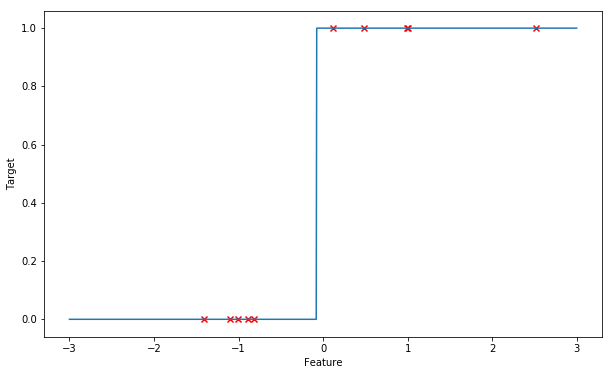

In [220]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

* In the case with no outliers Logistic Regression does a good job in seperating the classes
* We'll add an outlier and check if it still manages to do the same

In [214]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

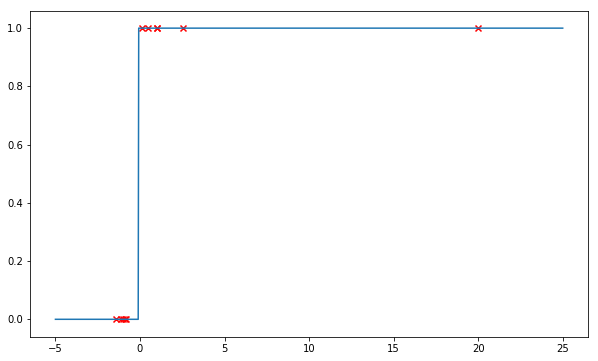

In [217]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-5, 25, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

* Even after adding outliers LR seperates the classes well.
* Thus its much more suitable for classification.


## John's Approach
***
- After learning this, John wanted to check how his data set could use the same techniques
- He wanted further insight to what his data set looks like and how he would go about implementing this 
- He thought it would be smart if he split his data set into a *Training Set* and *Test Set* 

    - I'll leave it to you to figure out why he thought this would be appropriate

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [14]:
dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
logistic_regressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

In [16]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print accuracy_score(y_test, y_pred)

0.72972972973


## Hyperparameter Tuning
***
* We saw while discussing regularization that by changing the value of 𝛂, we can control the bias-variance trade-off.<br>

* Similarly there are many such parameters, by controlling and changing whom we can fine tune performance of a model.

* Such parameters are called hyperparameters and the act of controlling and changing them to fine tune the performance of a model is called hyperparameter tuning.

*  *Hyperparameters are parameters whose values are set prior to the commencement of the learning process.*

## Hyperparameter Tuning
***
* By contrast, the value of other parameters is derived via training.


* Hyperparameter optimization or model selection is the problem of choosing a set of optimal hyperparameters for a learning algorithm, usually with the goal of optimizing a measure of the algorithm's performance on an independent data set.

## Hyperparameter Tuning
***
So, to summarize Hyperparameters: 

* Define higher level concepts about the model such as complexity, or capacity to learn.
* Cannot be learned directly from the data in the standard model training process and need to be predefined.
* Can be decided by setting different values, training different models, and choosing the values that test better.


## Hyperparameter Tuning
***
Some examples of hyperparameters: 


* Number of leaves or depth of a tree.
* Number of latent factors in a matrix factorization.
* Learning rate (in many models).
* Number of hidden layers in a deep neural network.
* Number of clusters in a k-means clustering.

## Overview of Methods of Hyperparamter Tuning
***
* Grid Search
* Random Search

## Grid Search
***
* Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

The grid is generally provided as a parameter.



## Grid Search
***
* Let's see how we can perform the gridsearch using sklearn.
* Here, first we decide which parameters we check using grid search, and also decide the values at which we want to carry out the search.

## Defining the parameters in `sklearn`
***
* We can specify the parameters for a particular element in the pipeline by concatenating the parameter name with element name using a double underscore ("__")
* For a single element, just specify parameter and values
* See an example below

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report

## For a single object
ridge = Ridge()
params = {"alpha": [1, 2, 5, 10],
          "fit_intercept": [True, False]}

In [21]:
## For a pipeline object
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

## Defining the parametrs grid
params = {'add_poly_features__degree':[2,3,4,5],
          'logistic_regression__penalty':['l1','l2']}

## Using `gridsearch` in `sklearn`
***
* After defining the object and the parameters grid, pass them in the  `GridSearchCV` and let sklearn take over!

In [22]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=params)
grid_search.fit(X_train,y_train)
y_prediction = grid_search.predict(X_test)

cross_val_score(grid_search.best_estimator_,X_train,y_train)

array([ 0.73611111,  0.75524476,  0.73943662])

## Random Search
***
* Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations.
* A model is constructed and evaluated for each combination of parameters chosen.


## Using Random Search in `sklearn` 
***

In [23]:
from sklearn.model_selection import RandomizedSearchCV
params = {'add_poly_features__degree': range(0,4),
          'logistic_regression__penalty':['l1','l2']}

rand_search = RandomizedSearchCV(estimator = pipeline,param_distributions = params, n_iter=5)
rand_search.fit(X_train,y_train)
y_prediction = rand_search.predict(X_test)

cross_val_score(rand_search.best_estimator_,X_train,y_train)

array([ 0.76388889,  0.77622378,  0.75352113])

## Changing Tracks for a bit
***
- Now that we're getting a better idea of Logistic Regression, we need to understand what is happening behind the scenes! 

- How are we getting correct predictions with the help of the sigmoid function? 

- As you might have guessed, like Linear Regression, this has a lot to do with our Paramters (thetas) AND how we get those optimal parameters (computationally)

- Getting those optimal parameters is directly related to the Cost Function!! Let's get straight to it! 

## Logistic Regression - Cost Function and Gradient Descent
***
- Till now we studied the intuition behind the Sigmoid Function

- We also studied how Logistic Regression works to get outputs in the range of [0,1]

- We discussed the interpretation of the output too! 

<div class="alert alert-block alert-info"> Now, like Linear Regression let's delve deeper into the intuition behind the Cost Function and how we apply Gradient Descent to make things work in Logistic Regression. It's actually quite clever!
</div>

## Cost Function 
***
 - Fit θ parameters
 - Define the optimization object for the cost function we use the fit the parameters
     - Training set consists of **"m"** training examples
         - Each example has is **n+1** length column vector
***      
 <center><img src='../images/Image[8].png' alt="Math" style="width: 350px;"/></center> 

## Cost Function
***
* This is the situation: 
  - Set of m training examples
  - Each example is a feature vector which is n+1 dimensional
  - x0 = 1
  - y ∈ {0,1}
  - Hypothesis is based on parameters (θ)
      - **Given the training set how to we chose/fit θ?**


## Cost Function
***
 - For Linear Regression we use the following Cost Function to determine optimal θ's
 ***      
 <center><img src='../images/Image[9].png' alt="Math" style="width: 250px;"/></center> 

## Cost Function
***
- Instead of writing the squared error term, we can write; if we define "cost()", 
Which evaluates to the cost for an individual example using the same measure as used in linear regression

 - We can redefine J(θ) as

***      
 <center><img src='../images/Image[10].png' alt="Math" style="width: 250px;"/></center> 

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Cost Function
***
 - What does this actually mean?
   - This is the cost you want the learning algorithm to pay if the **outcome is hθ(x)** and the *actual outcome is y*
   
 - What else do we need to consider?
   - We would like a **convex function** so if you run gradient descent you converge to a **global minimum**
   
 - Why? 
   - If we just use the Sigmoid function as is in the cost function on the previous slide, it's a **NON-CONVEX** function 
 
 - What do you mean by Non-Convex? 
   - Our hypothesis function has a non-linearity (sigmoid function of hθ(x) )
   - This is a non-linear function
   

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Cost Function - Local Optima vs Global Optima
***
Since it's non-convex:

 - If you take hθ(x) and plug it into the Cost() function, and them plug the Cost() function into J(θ) and plot J(θ) we find many **local optimum** -> non convex function
 
 - Why is this a problem?
     - Lots of **local minima** mean gradient descent may not find the **global optimum** - may get stuck in a global minimum
     - We would like a convex function so if you run gradient descent you converge to a global minimum
***      
 <center><img src='../images/local-optima.png' alt="Math" style="width: 500px;"/></center> 

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## A Convex Cost Function 
***
 - To get around this we need a different, convex Cost() function which means we can apply gradient descent
 - This is our Logistic Regression Cost Function: 
 ***
 <center><img src="../images/Images[12].jpg" alt="Math" style="width: 500px;"/></center>

 - Let's consider y = 1 and plot the fucntion
  ***  
 <center><img src='../images/Image[13].png' alt="Math" style="width: 250px;"/></center>

## Intuition - Convex Cost Function
***
 - X axis is what we predict
 
 - **Y axis is the cost associated with that prediction**
 
So when we're right, i.e when the predicted and actual y = 1 
 - cost function is 0
 
Else it slowly increases cost function as we become "more" wrong

This cost functions has some interesting properties:

 - If y = 1 and hθ(x) = 1
If hypothesis predicts exactly 1 and thats exactly correct then that corresponds to 0 (exactly, not nearly 0)

As hθ(x) goes to 0
 - Cost goes to infinity

This captures the intuition that if hθ(x) = 0 (predict P (y=1|x; θ) = 0) but y = 1 this will penalize the learning algorithm with a **massive cost**

## Intuition - Convex Cost Function
***
Let's plot the cost function when y = 0
***
 <center><img src='../images/Image[14].png' alt="Math" style="width: 250px;"/></center>

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Intuition - Convex Cost Function
***
 - When y = 0, we know that the cost is  -log(1- hθ( x ))
 
 
 - In essence, it's the inverese of the cost when y = 1. We can see that graphically [previous slide]
 
 
 - Now it goes to **plus infinity as hθ(x) goes to 1**
 
 
 - With our particular cost functions J(θ) is going to be **convex** and avoid local minimum

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Enter : Simplified Cost Function 
***
An easier way to write the cost function is when we combine the 2: 

 - cost(hθ, (x),y) = -ylog( hθ(x) ) - (1-y)log( 1- hθ(x) ) 
 


## Simplified Cost Function 
***
When y = 1
 - Then our equation simplifies to:
    - -log(hθ(x)) - (0)log(1 - hθ(x))
    - = -log(hθ(x))

 - **Which is what we had before when y = 1**
 

## Simplified Cost Function 
***
When y = 0

 - Then our equation simplifies to:
     - -(0)log(hθ(x)) - (1)log(1 - hθ(x))
     - = -log(1- hθ(x))
 - **Which is what we had before when y = 0**
 
Clever!

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Simplified Cost Function
***
To sum it up, our cost function for "m" training examples is: 
***
 <img src='../images/Image[16].png' alt="Math" style="width: 400px;"/>

## Utilizing Gradient Descent
***
 - Now to get minimum θ : Repeat: 
***
 <center><img src='../images/image31.png' alt="OB" style="width: 250px;"/></center>
***
 - We need to Minimize J(θ)

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Utilizing Gradient Descent
***
 - After doing some mathematical derivations and re-arranging, we get an Algorithm that's similar to the one we encountered in Linear Regression:
***
 <center><img src='../images/image34.png' alt="OB" style="width: 200px;"/></center>
***
and this is how we simultaneously update "θ" for all "j".  Also:
***
 <center><img src='../images/Image[17].png' alt="OB" style="width: 200px;"/></center>

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Simply Put
***
 <center><img src='../images/Image[18].png' alt="OB" style="width: 350px;"/></center>

## Back to John's Problem
***
John wants apply this model to his loan prediction dataset, but he will have to wait till you solve your project!


## Ways to Evaluate 
***
 - We can tell that if we sit to cross-check each and every prediction, it can take days to find out how well our model did
 
 - This calls for a better method to evaluate our model. Methods such as Confusion Matrix, accuracy, F1-score, etc are all very handy mechanisms and are very easy to build due to the advanced libraries available to us! 
 
 - Let's check these out! 

## Evalution Metrics for Logistic Regression
***
* As we already know, we use different metrics for regression and classification
* We know that we can use `MSE` for regression problems and `Accuracy` for classification problems
* However, these might not be the best metrics in every situation<br><br>

## Evalution Metrics for Logistic Regression
***
**Example**<br><br>
We are trying to detect credit card fraud.
Occurrence rate of fraud is 3 in 1000.
Let's say our model predicted as in the table : 


| Value | Fraud  | Not Fraud |
|---|---|---|
| Predicted Fraud | 1 | 1 |
| Predicted Not Fraud | 2 | 996 |


* Following are the types of Classification Metrics :
    * Confusion Matrix
    * Classification Matrix
    * F1 Score
    * Area under ROC curve
    * Classification Report
    * Logarithmic Loss

### Confusion Matrix
***
- The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. Below is an example of a Confusion Matrix 
<br><br>


| Value | Fraud  | Not Fraud |
|---|---|---|
| Predicted Fraud | 1 | 1 |
| Predicted Not Fraud | 2 | 996 |


    True Positives (TP): These are predicted yes and actually yes (Top Left)
    True Negatives (TN): We predicted no, and actually no (Top Right) 
    False Positives (FP): We predicted yes, but actually no. (AKA "Type I error.") (Top Right) 
    False Negatives (FN): We predicted no, but yes. (AKA"Type II error.") (Bottom Left)


### Confusion Matrix
***
* Classification accuracy is the number of correct predictions **(TN + TP)** made as a ratio of all predictions made. **(TN + TP +FN + FP)**<br><br>
It is suitable when :
* There are an equal number of observations in each class
* That all predictions and prediction errors are equally important,which is often not the case.

## John's Confusion Matrix
***
 - John now considers viewing the confusion matrix to see how well his model performed
 
 - Let's see how he did this in Python

In [24]:
# Applying confusion matrix on above data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 16,  46],
       [  4, 119]])

## Precision and Recall 
***
So we have 


| Value | Actual Class 1  | Actual Class 0 |
|---|---|---|
| Predicted Class 1| True +ve  | False +ve |
| Predicted Class 0 | False -ve | True -ve  |


Consider this: Let's say *y=1* in presence of Cancer in a patient

 - Now, of all patients where we predicted y = 1, what fraction actually has cancer? Think about this given the table above! 

## Precision and Recall 
***
It turns out that what we're trying to calculate is nothing but the **Precision** of the model

Here, 


$$Precision = \frac {(True +ves)} {(True +ves  +  False +ves)}$$

Doesn't this make sense? This is the fraction that **ACTUALLY** has Cancer

## Precision and Recall 
***
 - Now, of **all patients that actually have cancer**, what fraction did we **CORRECTLY** detect as having cancer? 
 
 - This is nothing but the recall! 
 
 - Here 

$$Recall = \frac {(True +ves)} {(True +ves  +  False -ves)}$$

<center><img src=../images/image99.png alt="precision and recall" style="width: 400px;"/></center>

## Trade - Off: Precision Vs. Recall 
***
- This is more of a in-class activity! 
- Think about this: What happens if we get an increased value of Precision? Do you think that would lower Recall? And vice-versa? 

- Think of an example! And use easy numerical calculations too. You can just use a pencil and paper, no need for code! 

- [**Hint**: There is a trade-off!] 

### F1 Score
***
 - To deal with this Trade-off we calculate something known as the F-1 Score: F1 score is a good approach to minimize a bias towards either the Precision or the Recall

 $$F1 Score = \frac {2PR} {P + R} $$

## F-1 Score 
***
F1 Score is defined as 

![](../images/image41.png)<br><br>


* tp = true positive
* tn = true negative
* fp = false positive
* fn = false negative

## John's F1 - score 
***
- Using this intuition, John wanted to calculate the F-1 Score to better understand the evaluation of his model

- Let's see how he implemented this in Python! 

In [25]:
## code for John's f-1 score

from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.82638888888888895

## Area under ROC Curve
***
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

- The AUC represents a model’s ability to discriminate between positive and negative classes.
 - An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.<br>
**Brain Teaser**: What does area < 0.5 signify?

### Area Under ROC Curve
***
ROC can be broken down into sensitivity and specificity. Let's understand these concept with this video

In [4]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/OAl6eAyP-yo" frameborder="0" allowfullscreen></iframe>')


## John's ROC Curve
***
- After learning this, John wanted to plot his very own ROC curve! 
- Let's see how he went about implementing this in Python

In [28]:

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.61277209546289013

## Logarithmic Loss
***
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class


Where,
* N is the number of samples or instances,
* M is the number of possible labels,
* y<sub>ij</sub> is a binary indicator of whether or not label j is the correct classification for instance i,
* p<sub>ij</sub> is the model probability of assigning label j to instance i.

![](../images/image49.png)

## Logarithmic Loss
***
* The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm.<br>
* Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.<br>
* logloss nearer to 0 is better, with 0 representing a perfect logloss. 

## John's Log Loss
***
 - John wanted to check this too! 
 
 - Let's check how he implemented this in Python, it's fairly easy thanks to sci-kit learn! 

In [29]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

9.3350032498774222

## Help John find out his status on loan approval
***
Now that you are equipped with the new weapon to handle classification problems and ways to evaluate the performances, help John find out if he would get a loan or not!

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />
# In-session Recap Time
***
* Decision Boundary
* Hyperparameter Tuning
* Cost Function
* Gradient Descent
* Evaluating Matrix
* Precision and Recall
* Logarithmic Loss

# Thank You
***
### Next Session: Logistics Regression
For more queries - Reach out to academics@greyatom.com 